In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import torch
from utils.defects import theta_cal, calculate_defects, S_cal, plot_defects
from nematic_env import ActiveNematicEnv

file_path = '/home/hou63/pj2/Nematic_RL/log_ucsd/lights_off_00/data_dump.h5'
f = h5py.File(file_path, 'r')
print(f.keys())
bm1 = f['Bm1_h']
print(bm1.shape)
# D = f['D']
# actions = f['actions']

# print(D.shape, actions.shape)
# actions = np.array(actions)

# new_action = actions[::10]
# print(new_action.shape)

# D = D[150:200,:,:,:]
# new_action = new_action[150:200,:]

# print(D.shape, new_action.shape)

<KeysViewHDF5 ['Bm1_h', 'psi_h', 'psim1_h', 'simu_args', 'u_h', 'v_h']>
(256, 256, 256)


In [3]:
print(new_action[:,5])

[ -9.85562229  -7.27384615  -8.51891518  -7.16899252  -8.2270174
  -9.0774889   -7.30796337  -5.99389553  -5.97639656  -6.46085453
  -6.96497059  -6.30164003  -4.63942814  -6.9258337   -7.55399084
  -6.60268116  -6.19166946  -4.52534056  -7.96417189  -6.77230358
  -7.99103117  -7.66702366  -9.11152458  -8.7860651   -7.34019041
  -8.23165894  -7.97921467  -9.44558144  -9.01743793 -10.16883945
  -9.87304115  -6.17700386  -8.62406349  -9.37503529  -9.5426569
  -6.16283083  -7.28284407  -7.18370819  -7.30720186  -6.42979336
  -7.71382904  -5.8936305   -6.76815367  -5.70487022  -5.07879448
  -6.18296051  -7.13223886  -7.76245594  -7.59861803  -7.5332675 ]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import moviepy.editor as mpy


def generate_video_with_improved_display(D, actions, theta_cal, calculate_defects, plot_defects, _action2light, output_path="output.mp4"):
    n_step, _, grid_size, _ = D.shape
    assert len(actions) == n_step, "Mismatch between steps in D and actions."

    frames = []  # To store the generated frames
    cmap = "gray"  # Use gray colormap for the action heatmap
    norm = mcolors.Normalize(vmin=0, vmax=1)  # Normalize for heatmap

    for t in range(5):
        print(f"Processing frame {t + 1}/{n_step}...")

        # Step 1: Compute theta
        theta = theta_cal(D[t, 0, :, :], D[t, 1, :, :])

        # Step 2: Compute defects
        defects = calculate_defects(theta)

        # Step 3: Compute action heatmap
        action_heatmap = _action2light(self_intensity=1.0, device=None, action=actions[t], grid_size=grid_size)

        # Step 4: Create plot
        fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
        ax.set_axis_off()  # Remove axis for the main plot

        # Plot defects
        plot_defects(defects, theta, ax)

        # Overlay action heatmap in grayscale
        ax.imshow(action_heatmap, cmap=cmap, alpha=0.5, extent=[0, grid_size, 0, grid_size], origin="lower")

        # Add colorbar
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        cbar = fig.colorbar(sm, ax=ax, orientation="vertical", fraction=0.046, pad=0.04)
        cbar.set_label("Action Intensity", fontsize=10)

        # Add title below plot to display action[5]
        action_text = f"Action[5]: {actions[t][5]:.2f}"
        ax.set_title(action_text, fontsize=12, pad=10)

        # Save current frame
        fig.canvas.draw()
        frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        frames.append(frame)

        plt.close(fig)

    # Step 5: Generate video
    print("Generating video...")
    clip = mpy.ImageSequenceClip(frames, fps=24)  # 24 FPS
    clip.write_videofile(output_path, codec="libx264")
    print(f"Video saved to {output_path}")

# Example usage:
# generate_video_with_improved_display(D, actions, theta_cal, calculate_defects, plot_defects, _action2light, "defects_video.mp4")

# Example usage:
generate_video_with_improved_display(D, new_action, theta_cal, calculate_defects, plot_defects,
               ActiveNematicEnv._action2light, "/home/hou63/pj2/Nematic_RL/movie/test/defects_video.mp4")

Processing frame 1/50...


Processing frame 2/50...
Processing frame 3/50...


In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import torch
from utils.defects import theta_cal, calculate_defects, S_cal
from utils.defects import plot_defects
from nematic_env import ActiveNematicEnv



file_path = '/home/hou63/pj2/Nematic_RL/log_ucsd/PPO_27/data_dump.h5'
f = h5py.File(file_path, 'r')
print(f.keys())
D = f['D']
actions = f['actions']

print(D.shape, actions.shape)

# transfer on torch
device = 'cuda:1' if torch.cuda.is_available() else 'cpu'
print('device = ', device)

D = np.array(D)
actions = np.array(actions)
print(D.shape)

# D = torch.tensor(D, device=device)
# actions = torch.tensor(actions, device=device)
# print(D.shape, actions.shape)

<KeysViewHDF5 ['D', 'actions']>
(2501, 2, 256, 256) (25001, 6)
device =  cuda:1
(2501, 2, 256, 256)


In [ ]:
class MovieInfo:
    def __init__(self):
        self.theta = []
        self.defects = []

    def make_pic(self, ax):
        plot_defects(self.defects, self.theta, ax)

class AllInfo:
    def __init__(self, D, actions):
        d11 = D[:, 0, :, :]
        d12 = D[:, 1, :, :]
        self.thetas = theta_cal(d11, d12)
        self.length = D.shape[0]



In [2]:
ind = 4
d11 = D[:, 0, :, :]
d12 = D[:, 1, :, :]
print(d11.shape)
action_tmp = actions[ind, :]

thetas = theta_cal(d11, d12)
print(thetas.shape)
# defects = calculate_defects(thetas, device=device)
# S = S_cal(d11, d12)
# print(defects.__len__())

torch.Size([2501, 256, 256])
torch.Size([2501, 256, 256])


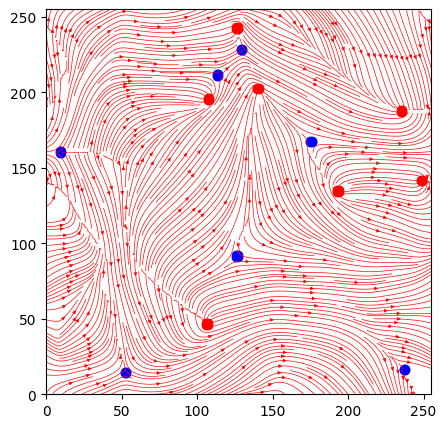

In [6]:
ind = 4

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
d11 = D[ind,0,:,:]
d12 = D[ind,1,:,:]
action_tmp = actions[ind]
thetas = theta_cal(d11, d12)

defects_arrr = calculate_defects(thetas)
plot_defects(defects_arrr, thetas, ax)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

# 设置保存图片的文件夹
output_folder = '/home/hou63/pj2/Nematic_RL/movie/test1'
os.makedirs(output_folder, exist_ok=True)

# random np matrix 256*256*100
np.random.seed(0)
data = np.random.rand(256, 256, 100)

# 生成并保存多张图片（假设你想生成100帧的图片）
num_frames = 100
for i in range(num_frames):
    plt.figure()
    plt.imshow(data[:,:,i])  # 示例图，可替换为你的绘图逻辑
    plt.title(f"Frame {i+1}")
    plt.savefig(f"{output_folder}/frame_{i:03d}.png")
    plt.close()

# 图片文件路径按顺序排序
image_files = sorted([os.path.join(output_folder, f) for f in os.listdir(output_folder) if f.endswith('.png')])

# 使用 OpenCV 生成视频
output_video = '/home/hou63/pj2/Nematic_RL/movie/output_video.mp4'
frame_rate = 24  # 设置帧率
frame_size = None

# 读取第一张图片的尺寸，用于视频大小设置
if image_files:
    first_frame = cv2.imread(image_files[0])
    frame_size = (first_frame.shape[1], first_frame.shape[0])

# 初始化视频写入器
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(output_video, fourcc, frame_rate, frame_size)

# 将每张图片写入视频
for image_file in image_files:
    frame = cv2.imread(image_file)
    video_writer.write(frame)

# 释放视频写入器
video_writer.release()
print(f"视频已成功保存为 {output_video}")

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

# 设置保存图片的文件夹
output_folder = '/home/hou63/pj2/Nematic_RL/movie/test1'
os.makedirs(output_folder, exist_ok=True)

# random np matrix 256*256*100
np.random.seed(0)
data = np.random.rand(256, 256, 100)

# 生成并保存多张图片（假设你想生成100帧的图片）
num_frames = 100
for i in range(num_frames):
    plt.figure()
    plt.imshow(data[:,:,i])  # 示例图，可替换为你的绘图逻辑
    plt.title(f"Frame {i+1}")
    plt.savefig(f"{output_folder}/frame_{i:03d}.png")
    plt.close()

# 图片文件路径按顺序排序
image_files = sorted([os.path.join(output_folder, f) for f in os.listdir(output_folder) if f.endswith('.png')])

# 使用 OpenCV 生成视频
output_video = '/home/hou63/pj2/Nematic_RL/movie/output_video.mp4'
frame_rate = 24  # 设置帧率
frame_size = None

# 读取第一张图片的尺寸，用于视频大小设置
if image_files:
    first_frame = cv2.imread(image_files[0])
    frame_size = (first_frame.shape[1], first_frame.shape[0])

# 初始化视频写入器
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(output_video, fourcc, frame_rate, frame_size)

# 将每张图片写入视频
for image_file in image_files:
    frame = cv2.imread(image_file)
    video_writer.write(frame)

# 释放视频写入器
video_writer.release()
print(f"视频已成功保存为 {output_video}")

视频已成功保存为 /home/hou63/pj2/Nematic_RL/movie/output_video.mp4


In [2]:
solver_paras = (geo_params, flow_params, simu_params)
# env = ActiveNematicEnv(solver_paras, device=device)

# solver_paras = (geo_params, flow_params, simu_params)

solver = KineticSolver(*solver_paras, device=device)
data_path = '/home/yuh113/pj2/Nematic_RL/datas/data_2000.pkl'
# data_path = '/home/hou63/pj2/Nematic_RL/datas/simulation_data_test.pkl'
# simulation_data = KineticData(*solver.initialize2_pytorch(seed=918), solver.simu_args)
# simulation_data = KineticData.loader(data_path)

encoder_path = '/home/yuh113/pj2/Nematic_RL/log_model/encoder_checkpoint.pth'  # 模型保存路径


# simulation_data = solver.preloop_kinetic(simulation_data, num_itr=32000)
# print(simulation_data)
# simulation_data = simulation_data.loader(data_path, device=device)
env = ActiveNematicEnv(solver_paras, solver=solver,
                        device=device,
                        data_path=data_path, intensity=10, encoder_path=encoder_path)

modal_path = '/home/yuh113/pj2/Nematic_RL/logs_ucsd/PPO_11/lights_on_model.zip'
model = PPO.load(modal_path, env=env)

print('model loaded')

 dx_  0.0390625  dth_  0.02454369260617026  dt  0.0004


KeyboardInterrupt: 

In [ ]:
simulation_data = env.simulation_data


RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.